In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change the display options for a better experience
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [2]:
# Load the Titanic dataset into the variable df.
df = sns.load_dataset("titanic")

# HAVE A FIRST LOOK AT THE DATA

In [3]:
df.info()  # We have a dataset of 891 rows and 15 columns (6 numeric,2 boolean and 7 categorical).
# Two of the columns include null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.head()  # It seems like we have some unnecessary columns. ("Survived"-"alive"),("pclass"-"class"),
# ("embarked"-"embark_town"),("sex"-"who") pairs save the similar information.
# Let's just start cleaning the data by removing the "survived","pclass","who","embarked" columns
# Please note that, I choose  "survived" and "pclass" over "alive" and "class" to remove
# to keep categorical columns in object or categorical type rather than numeric types.
df.drop(["survived", "pclass", "who", "embarked"], axis=1, inplace=True)

In [5]:
# According to my research, "sibsp" and "parch" represents the number of siblings and number of parents or children
# abord, respectively. Let's see if the column "alone" is based on that information.

df[(df["sibsp"] == 0) & (df["parch"] == 0)].value_counts("alone")
df[(df["sibsp"] != 0) & (df["parch"] != 0)].value_counts("alone")
# The first line of code says, if both attributes are zero, the only value in the column "alone" is True
# The second line of code says, if none of them is zero, "alone" columns is full of False values.
# Therefore, I can create the column "alone" whenever I want, so I will remove it for now.
df.drop(["alone"], axis=1, inplace=True)

In [6]:
# The column "adult_male" is probably based on a condition of sex and age. Let's check.
df[df["adult_male"]==True].sex.value_counts()  # Only males, as excepted.
df[df["adult_male"]==True].age.min()  # 16 and above are considered to be adult. Noted! Let's drop that column also.
df.drop("adult_male",axis=1,inplace=True)

In [7]:
# The column "deck" includes a lot of nulls. Probably it is best to drop it, too
df.deck.values.isna().sum()  # 688 out of 891 rows are null. Let's just remove it.
df.drop("deck",axis=1,inplace=True)
#  We ended up to have 891 rows and 8 columns left. Great job!

# CATEGORICAL VARIABLE ANALYSIS

In [8]:
# Let's see which of the remaining columns are non-numerical
df.info() # We have 4 unique dtypes remaining : float64,int64,object and category
cat_cols = [cols for cols in df.columns if df[cols].dtype in ["object", "category"]]
# Sex,class,embark_town and alive columns are non-numerical. Cool!
df_cat = df[cat_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          714 non-null    float64 
 2   sibsp        891 non-null    int64   
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 49.9+ KB


In [9]:
# Let's write a function
def cat_summary(df,col_name,plot=False):
    print("\n####### {} #######".format(col_name.upper()))
    print(pd.DataFrame({"Count":df[col_name].value_counts(), "Ratio": round(100*df[col_name].value_counts()/len(df),2)}))
    if plot:
        sns.countplot(data=df,x=df[col_name])


####### SEX #######
        Count  Ratio
male      577  64.76
female    314  35.24


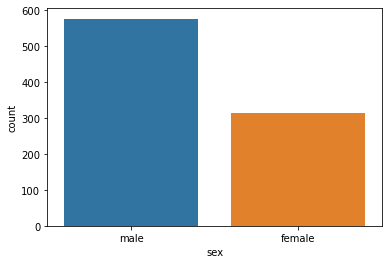


####### CLASS #######
        Count  Ratio
Third     491  55.11
First     216  24.24
Second    184  20.65


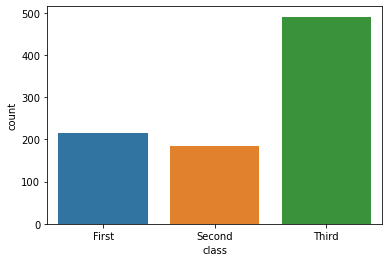


####### EMBARK_TOWN #######
             Count  Ratio
Southampton    644  72.28
Cherbourg      168  18.86
Queenstown      77   8.64


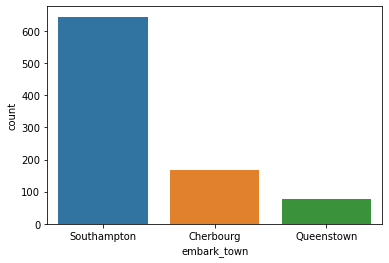


####### ALIVE #######
     Count  Ratio
no     549  61.62
yes    342  38.38


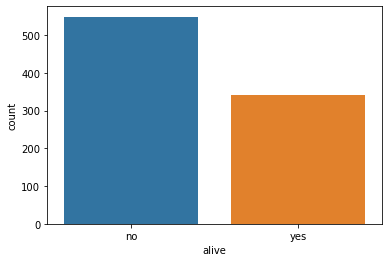

In [10]:
for col in df_cat.columns:
    cat_summary(df_cat,col,plot=True)
    plt.show()

# NUMERICAL VARIABLE ANALYSIS

In [11]:
# Let's first assign the numerical columns into a new variable.
df_num=[]
for col_name in df.columns:
    if col_name not in df_cat.columns:
        df_num.append(col_name)
        
# Awesome! ['age', 'sibsp', 'parch', 'fare'] is the list of numeric columns.
df_num = df[df_num]

In [12]:
def num_summary(df,col_name,plot=False):
    print("\n####### {} #######".format(col_name.upper()))
    print(df[col_name].describe())
    sns.histplot(data=df,x=col_name)
    plt.show()


####### AGE #######
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


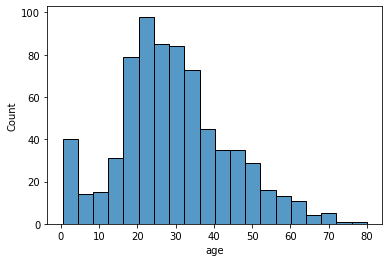


####### SIBSP #######
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64


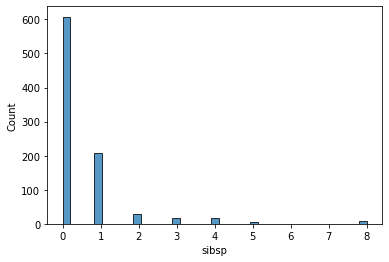


####### PARCH #######
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64


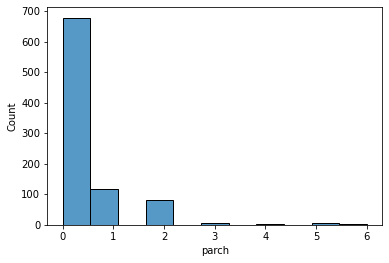


####### FARE #######
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


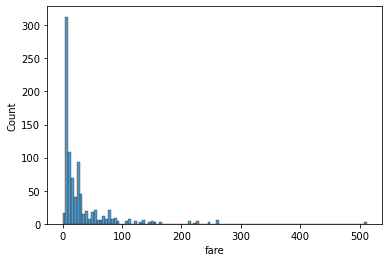

In [13]:
for col_name in df_num.columns:
    num_summary(df_num,col_name)

# Target variable analysis

In [14]:
# Since Titanic is famous for its crash which resulted in a lot of deaths, let's now try to figure out which factors might 
# have determined either a passenger died or not i.e "alive" vs other columns.

In [50]:
# As a remainder, I removed "survived" column at the beginning not to have numeric values in a categorical column.
# However, I now want to have 1's and 0's to inspect deaths further. So I will re-create the "survived" column.
df["survived"] = [1 if row=="yes" else 0 for row in df.alive]

In [113]:
# Let's create a function that calculates the survival percentage according to a categorical column.
# And plots the results
def survival_percentage(df,column):
    if col_name!="alive":  ## I have excluded the column "alive" since it is meaningless
        print("###############")
        print(df.groupby(column)["survived"].mean())
        sns.barplot(x=df.groupby(column)["survived"].mean().index,y=list(df.groupby(column)["survived"].mean()))
        plt.show()

###############
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


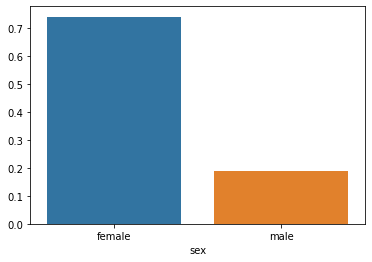

###############
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


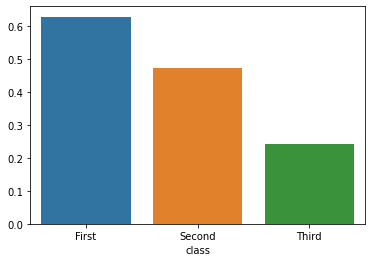

###############
embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64


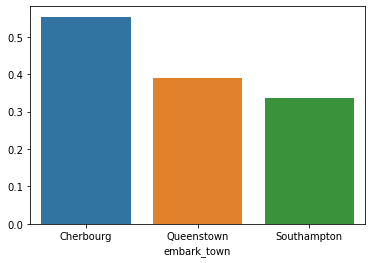

In [114]:
for col_name in df_cat.columns:
    survival_percentage(df,col_name)

# Important things to note here, almost 75% of women survived whereas this ratio is 18% for men.
# 63% of the first class passengers survived whereas every 3 of 4 person lost their lives in third class.